In [1]:
import glob
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from utils import helpers
from dotenv import load_dotenv
from utils.prepare_modis import download_data

In [2]:
load_dotenv()  

def getenv(key: str) -> str :
    value = os.getenv(key)
    if value is None:
        # Handle the case where the environment variable is not set
        raise ValueError(f"Environment variable '{key}' is not set.")
    return value

# Example usage:
username = getenv("USERNAME")
password = getenv("PASSWORD")

In [3]:
# Open the file in read mode
with open("urls_chloro.txt", "r") as f:
    # Read all lines into a list
    urls = f.readlines()

urls = [url.strip() for url in urls]

In [5]:
download_data(urls, "chloro_data", username, password)

INFO:root:Downloading https://oceandata.sci.gsfc.nasa.gov/cgi/getfile/AQUA_MODIS.20230201_20230228.L3m.MO.CHL.chlor_a.4km.nc, status code: 200
INFO:root:Downloaded https://oceandata.sci.gsfc.nasa.gov/cgi/getfile/AQUA_MODIS.20230201_20230228.L3m.MO.CHL.chlor_a.4km.nc to chloro_data/AQUA_MODIS.20230201_20230228.L3m.MO.CHL.chlor_a.4km.nc
INFO:root:Downloading https://oceandata.sci.gsfc.nasa.gov/cgi/getfile/AQUA_MODIS.20230301_20230331.L3m.MO.CHL.chlor_a.4km.nc, status code: 200
INFO:root:Downloaded https://oceandata.sci.gsfc.nasa.gov/cgi/getfile/AQUA_MODIS.20230301_20230331.L3m.MO.CHL.chlor_a.4km.nc to chloro_data/AQUA_MODIS.20230301_20230331.L3m.MO.CHL.chlor_a.4km.nc
INFO:root:Downloading https://oceandata.sci.gsfc.nasa.gov/cgi/getfile/AQUA_MODIS.20230401_20230430.L3m.MO.CHL.chlor_a.4km.nc, status code: 200
INFO:root:Downloaded https://oceandata.sci.gsfc.nasa.gov/cgi/getfile/AQUA_MODIS.20230401_20230430.L3m.MO.CHL.chlor_a.4km.nc to chloro_data/AQUA_MODIS.20230401_20230430.L3m.MO.CHL.chlo

In [6]:
file_path = "chloro_data/"
files = glob.glob(file_path + "*.nc")

In [7]:
# Open the netCDF file 
data = nc.Dataset(files[0], "r")

In [8]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    product_name: AQUA_MODIS.20230301_20230331.L3m.MO.CHL.chlor_a.4km.nc
    instrument: MODIS
    title: MODISA Level-3 Standard Mapped Image
    project: Ocean Biology Processing Group (NASA/GSFC/OBPG)
    platform: Aqua
    source: satellite observations from MODIS-Aqua
    temporal_range: month
    processing_version: R2022.0
    date_created: 2023-05-10T05:40:56.000Z
    history: l3mapgen par=AQUA_MODIS.20230301_20230331.L3m.MO.CHL.chlor_a.4km.nc.param 
    l2_flag_names: ATMFAIL,LAND,HILT,HISATZEN,STRAYLIGHT,CLDICE,COCCOLITH,LOWLW,CHLWARN,CHLFAIL,NAVWARN,MAXAERITER,ATMWARN,HISOLZEN,NAVFAIL,FILTER,HIGLINT
    time_coverage_start: 2023-03-01T00:25:00.000Z
    time_coverage_end: 2023-04-01T03:00:00.000Z
    start_orbit_number: 110760
    end_orbit_number: 111213
    map_projection: Equidistant Cylindrical
    latitude_units: degrees_north
    longitude_units: degrees_east
    northernmost_latitude:

In [9]:
count, paths = helpers.count_empty_netcdf_files(files)

In [10]:
print(count,paths)

0 ['chloro_data/AQUA_MODIS.20230301_20230331.L3m.MO.CHL.chlor_a.4km.nc', 'chloro_data/AQUA_MODIS.20230201_20230228.L3m.MO.CHL.chlor_a.4km.nc', 'chloro_data/AQUA_MODIS.20230501_20230531.L3m.MO.CHL.chlor_a.4km.nc', 'chloro_data/AQUA_MODIS.20230701_20230731.L3m.MO.CHL.chlor_a.4km.nc', 'chloro_data/AQUA_MODIS.20230601_20230630.L3m.MO.CHL.chlor_a.4km.nc', 'chloro_data/AQUA_MODIS.20230901_20230930.L3m.MO.CHL.chlor_a.4km.nc', 'chloro_data/AQUA_MODIS.20231201_20231231.L3m.MO.CHL.chlor_a.4km.NRT.nc', 'chloro_data/AQUA_MODIS.20231101_20231130.L3m.MO.CHL.chlor_a.4km.NRT.nc', 'chloro_data/AQUA_MODIS.20230801_20230831.L3m.MO.CHL.chlor_a.4km.nc', 'chloro_data/AQUA_MODIS.20231001_20231031.L3m.MO.CHL.chlor_a.4km.NRT.nc', 'chloro_data/AQUA_MODIS.20230401_20230430.L3m.MO.CHL.chlor_a.4km.nc']


In [11]:
helpers.plot_poc_data(paths)

ERROR:root:Error processing file chloro_data/AQUA_MODIS.20230301_20230331.L3m.MO.CHL.chlor_a.4km.nc: poc not found in /
ERROR:root:Error processing file chloro_data/AQUA_MODIS.20230201_20230228.L3m.MO.CHL.chlor_a.4km.nc: poc not found in /
ERROR:root:Error processing file chloro_data/AQUA_MODIS.20230501_20230531.L3m.MO.CHL.chlor_a.4km.nc: poc not found in /
ERROR:root:Error processing file chloro_data/AQUA_MODIS.20230701_20230731.L3m.MO.CHL.chlor_a.4km.nc: poc not found in /
ERROR:root:Error processing file chloro_data/AQUA_MODIS.20230601_20230630.L3m.MO.CHL.chlor_a.4km.nc: poc not found in /
ERROR:root:Error processing file chloro_data/AQUA_MODIS.20230901_20230930.L3m.MO.CHL.chlor_a.4km.nc: poc not found in /
ERROR:root:Error processing file chloro_data/AQUA_MODIS.20231201_20231231.L3m.MO.CHL.chlor_a.4km.NRT.nc: poc not found in /
ERROR:root:Error processing file chloro_data/AQUA_MODIS.20231101_20231130.L3m.MO.CHL.chlor_a.4km.NRT.nc: poc not found in /
ERROR:root:Error processing file

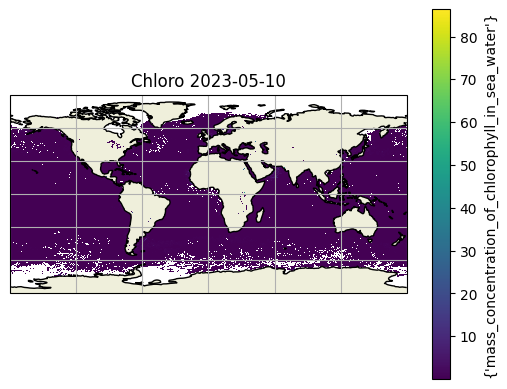

In [37]:
# Load the netCDF file
#data = nc.Dataset(file)
data = nc.Dataset(files[0], "r")
date = data.date_created[:10]
# Extract poc data as a numpy array
chloro = data["chlor_a"][:]
standard_name = {data["chlor_a"].standard_name}
units = {data["chlor_a"].units}

# Create a GeoAxes with plate carree projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add land, coastlines and gridlines
ax.add_feature(cfeature.LAND)
ax.coastlines()
ax.gridlines()

# Plot the poc data as a pcolormesh
plt.pcolormesh(
    data["lon"][:], data["lat"][:], chloro, transform=ccrs.PlateCarree()
)

plt.title(f"Chloro {date}")
# Add axis labels
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add colorbar
cbar = plt.colorbar()
cbar.set_label(f"{standard_name}")

# Set colorbar tick locations and labels
# cbar.set_ticks([0, 200, 400, 600, 800])
# cbar.set_ticklabels(["0", "200", "400", "600", "800"])

# Show the plot
plt.show()

In [35]:
data["chlor_a"].units

'mg m^-3'